**Name:** Shreya Vinay Nayak

**Github Username:** ShreyaNayak256

**USC ID:** 8592810456

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.feature_selection import chi2
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import operator
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_excel ('../data/Folds5x2_pp.xlsx')
print (df)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


**b) i. How many rows are in this data set? How many columns? What do the rows and columns represent?**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


Ans: 

There are 9568 rows in this data set. (The rows are indexed from 0 to 9567)

There are 5 columns in this dataset.

Each row in the dataframe represents an instance or "entry" of data in the dataset. The instances of data are collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load.

The columns represent the features which consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

**b) ii. Make pairwise scatterplots of all the variables in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.**

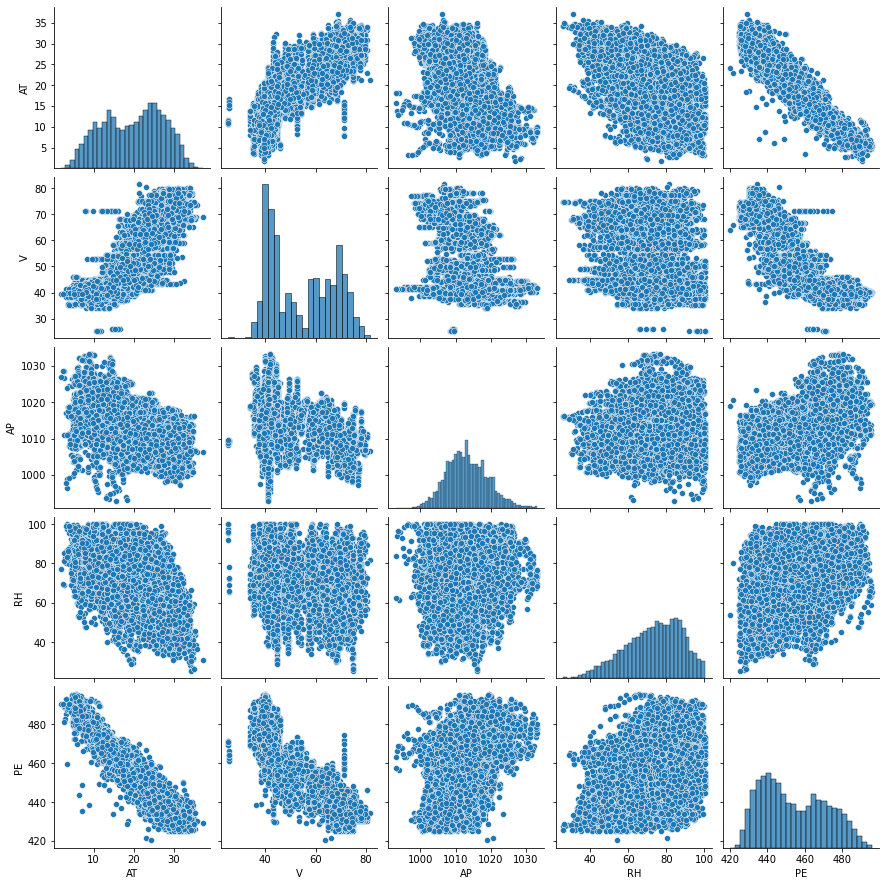

In [4]:
sns.pairplot(df)

### Description of findings:

### PE and AT , PE and V: have visible negative correlation

### AT and V : have strong positive correlation

### For the rest of the pairs the plots are scattered indicating very weak or no correlation.


**b) iii. What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.**

In [5]:
desc = df.describe()

In [6]:
desc

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
desc['AT']['min']

1.81

In [8]:
l1=[]
l2=[]
for i in desc.columns:
    inter_quartile_range=desc[i]['75%']-desc[i]['25%']
    ranges=desc[i]['max']-desc[i]['min']
    l1.append(inter_quartile_range)
    l2.append(ranges)
print(l1)
print(l2)

[12.209999999999999, 24.800000000000004, 8.159999999999968, 21.502499999999998, 28.680000000000007]
[35.3, 56.2, 40.40999999999997, 74.6, 75.5]


In [9]:
desc.loc[len(desc.index)] = l1


In [10]:
#checking if new row added
desc

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
8,12.210000,24.800000,8.160000,21.502500,28.680000


In [11]:
indexNames = desc.index.values

In [12]:
indexNames[8]='Inter-quartile Range'

In [13]:
desc.loc[len(desc.index)] = l2

In [14]:
indexNames1 = desc.index.values

In [15]:
indexNames1[9]='Range'

In [16]:
desc

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
Inter-quartile Range,12.210000,24.800000,8.160000,21.502500,28.680000
Range,35.300000,56.200000,40.410000,74.600000,75.500000


**c) For each predictor fit a simple linear regression model to predict the response. Describe your results. 
In which of the models is there a statistically significant association between the predictor and the response?**

**Create some plots to back up your assertions.**

**Are there any outliers that you would like to remove from your data for each of these regression tasks?**

In [17]:
# SUmmary table

In [18]:
X=df[['AT','V','AP','RH']]
X=sm.add_constant(X)
y=np.array(df['PE'])



0.8989475964148236


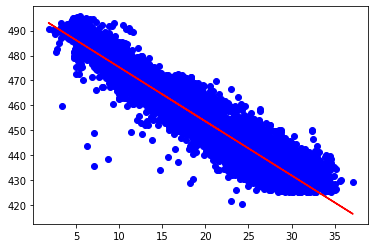

In [19]:
model_AT= LinearRegression()  
model_AT.fit(np.array(X['AT']).reshape(-1,1), y)
print(model_AT.score(np.array(X['AT']).reshape(-1,1), y))
y_predict = model_AT.predict(np.array(X['AT']).reshape(-1,1))
plt.scatter(np.array(X['AT']).reshape(-1,1), y, color ='b')
plt.plot(np.array(X['AT']).reshape(-1,1), y_predict, color ='r')
#This shows a scatter of the predicted values  
plt.show()

In [20]:
xm=sm.add_constant(X['AT'])
model_AT = sm.OLS(y, xm)    
res1 = model_AT.fit()       
print(res1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:57:16   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

In [21]:
MAE = mean_absolute_error(y_true=y,y_pred=y_predict)
#squared True returns MSE value, False returns RMSE value.
MSE = mean_squared_error(y_true=y,y_pred=y_predict) #default=True
RMSE = mean_squared_error(y_true=y,y_pred=y_predict,squared=False)
  
print("MAE:",MAE)
print("MSE:",MSE)
print("RMSE:",RMSE)

MAE: 4.2879818941014625
MSE: 29.431702011093517
RMSE: 5.4250992627871355


0.756517787068398


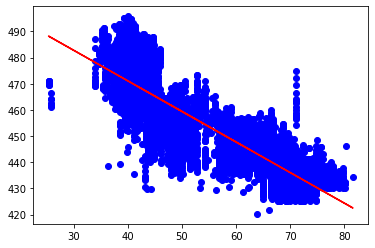

In [22]:
#for feature V
model_V= LinearRegression()  
model_V.fit(np.array(X['V']).reshape(-1,1), y)
print(model_V.score(np.array(X['V']).reshape(-1,1), y))
y_predict = model_V.predict(np.array(X['V']).reshape(-1,1))
plt.scatter(np.array(X['V']).reshape(-1,1), y, color ='b')
plt.plot(np.array(X['V']).reshape(-1,1), y_predict, color ='r')
#This shows a scatter of the predicted values  
plt.show()

In [23]:
xm=sm.add_constant(X['V'])
model_V = sm.OLS(y, xm)    
res2 = model_V.fit()       
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:57:16   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

In [24]:
MAE = mean_absolute_error(y_true=y,y_pred=y_predict)
#squared True returns MSE value, False returns RMSE value.
MSE = mean_squared_error(y_true=y,y_pred=y_predict) #default=True
RMSE = mean_squared_error(y_true=y,y_pred=y_predict,squared=False)
  
print("MAE:",MAE)
print("MSE:",MSE)
print("RMSE:",RMSE)

MAE: 6.576494401089986
MSE: 70.91465103018822
RMSE: 8.421083720649511


0.2687686564110674


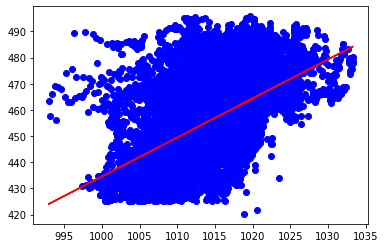

In [25]:
model_AP= LinearRegression()  
model_AP.fit(np.array(X['AP']).reshape(-1,1), y)
print(model_AP.score(np.array(X['AP']).reshape(-1,1), y))
y_predict = model_AP.predict(np.array(X['AP']).reshape(-1,1))
plt.scatter(np.array(X['AP']).reshape(-1,1), y, color ='b')
plt.plot(np.array(X['AP']).reshape(-1,1), y_predict, color ='r')
#This shows a scatter of the predicted values  
plt.show()

In [26]:
xm=sm.add_constant(X['AP'])
model_AP = sm.OLS(y, xm)    
res3 = model_AP.fit()       
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:57:16   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

In [27]:
MAE = mean_absolute_error(y_true=y,y_pred=y_predict)
#squared True returns MSE value, False returns RMSE value.
MSE = mean_squared_error(y_true=y,y_pred=y_predict) #default=True
RMSE = mean_squared_error(y_true=y,y_pred=y_predict,squared=False)
  
print("MAE:",MAE)
print("MSE:",MSE)
print("RMSE:",RMSE)

MAE: 11.957573979255875
MSE: 212.9724998331263
RMSE: 14.59357734872181


0.15193944023117578


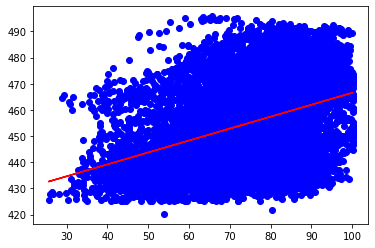

In [28]:
model_RH= LinearRegression()  
model_RH.fit(np.array(X['RH']).reshape(-1,1), y)
print(model_RH.score(np.array(X['RH']).reshape(-1,1), y))
y_predict = model_RH.predict(np.array(X['RH']).reshape(-1,1))
plt.scatter(np.array(X['RH']).reshape(-1,1), y, color ='b')
plt.plot(np.array(X['RH']).reshape(-1,1), y_predict, color ='r')
#This shows a scatter of the predicted values  
plt.show()

In [29]:
xm=sm.add_constant(X['RH'])
model_RH = sm.OLS(y, xm)    
res4 = model_RH.fit()       
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:57:17   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

In [30]:
MAE = mean_absolute_error(y_true=y,y_pred=y_predict)
#squared True returns MSE value, False returns RMSE value.
MSE = mean_squared_error(y_true=y,y_pred=y_predict) #default=True
RMSE = mean_squared_error(y_true=y,y_pred=y_predict,squared=False)
  
print("MAE:",MAE)
print("MSE:",MSE)
print("RMSE:",RMSE)

MAE: 13.194021583644044
MSE: 246.99922809296348
RMSE: 15.716209087848236


### **Description of Results:**



**In which of the models is there a statistically significant association between the predictor and the response?**\
p-values are 0 that means the factor is very significant and it just rounded off. This can be seen for all the 4 predictors. Thus all the 4 predictors i.e AT,V,AP and RH have a statistically significant association with the response. 


**Are there any outliers that you would like to remove from your data for each of these regression tasks?**\
Yes

Outliers are defined as data points that fall far away from the rest of the cloud of data points. They do not fit with the rest of the data and make the regression line less accurate in predicting other data.

In each of the plots it can be seen that there are some points which lie far away from the cloud of data points and the regression line. They are the outliers which can be removed from the data in order to make the prediction more accurate.

Boxplots help in easy and quick detection of outliers. The following boxplots prove that there exist outliers which may hamper the performance of regression models



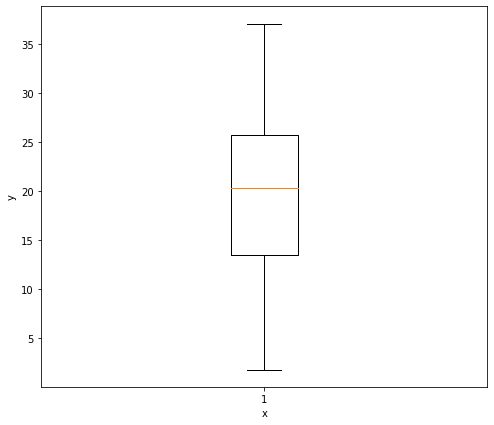

In [31]:
#For the feature AT
fig = plt.figure(figsize =(8, 7))
plt.boxplot(X['AT'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

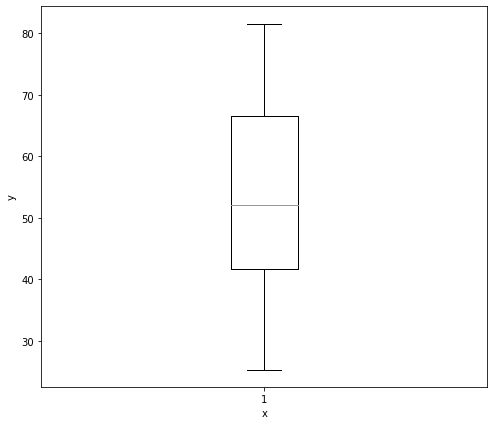

In [32]:
#For the feature V
fig = plt.figure(figsize =(8, 7))
plt.boxplot(X['V'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

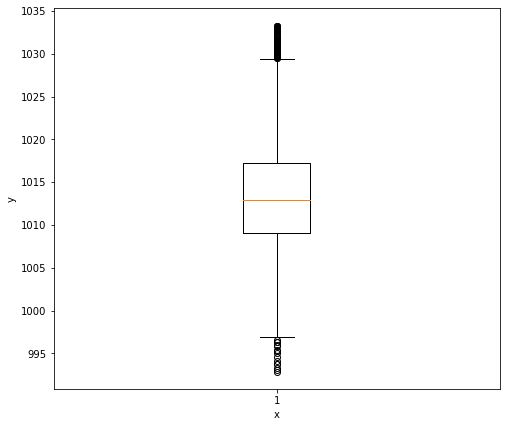

In [33]:
#For the feature AP
fig = plt.figure(figsize =(8, 7))
plt.boxplot(X['AP'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

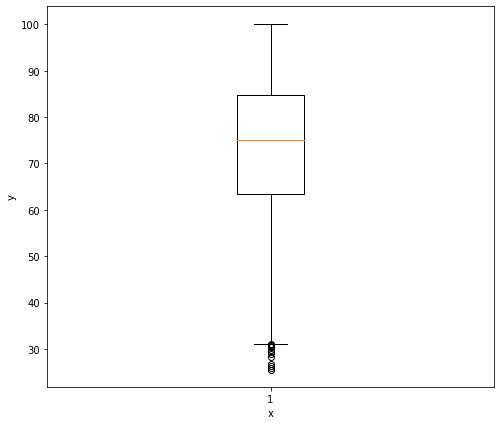

In [34]:
#For the feature RH
fig = plt.figure(figsize =(8, 7))
plt.boxplot(X['RH'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**(d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?**

In [35]:
model= LinearRegression()  
model.fit(X, y)
print(model.score(X, y))

0.9286960898122536


In [36]:
print(model.coef_)

[ 0.         -1.97751311 -0.23391642  0.06208294 -0.1580541 ]


In [37]:
X=df[['AT','V','AP','RH']]
y=df['PE']
X=sm.add_constant(X)
mod = sm.OLS(y,X)
fitted_model = mod.fit()
print(fitted_model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.929     
Dependent Variable: PE               AIC:                56186.2290
Date:               2022-09-23 11:57 BIC:                56222.0599
No. Observations:   9568             Log-Likelihood:     -28088.   
Df Model:           4                F-statistic:        3.114e+04 
Df Residuals:       9563             Prob (F-statistic): 0.00      
R-squared:          0.929            Scale:              20.778    
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
const      454.6093    9.7485    46.6337  0.0000  435.5001  473.7184
AT          -1.9775    0.0153  -129.3420  0.0000   -2.0075   -1.9475
V           -0.2339    0.0073   -32.1221  0.0000   -0.2482   -0.2196
AP           0.0621    0.0095     6.5641  0.0000    0.0435  

### A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

### Since none of the predictors have p-value>0.05, it means that all of them are statistically significant. This implies that their respective coefficient (β) cannot be 0. Therefore we reject the null for all the predictors.

**(e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.**

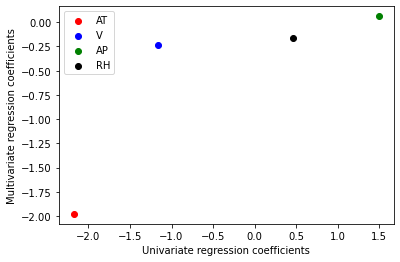

In [38]:
y_coeff = list(fitted_model.params)[1:]
# x_coeff = [model_AT.coef_[0][0],model_V.coef_[0][0],model_AP.coef_[0][0],model_RH.coef_[0][0]]
x_coeff=[res1.params['AT'],res2.params['V'],res3.params['AP'],res4.params['RH']]
plt.scatter(x_coeff[0],y_coeff[0],color="red",label="AT")
plt.scatter(x_coeff[1],y_coeff[1],color="blue",label="V")
plt.scatter(x_coeff[2],y_coeff[2],color="green",label="AP")
plt.scatter(x_coeff[3],y_coeff[3],color="black",label="RH")
plt.xlabel('Univariate regression coefficients')
plt.ylabel('Multivariate regression coefficients')
plt.legend()

**How do your results from 1c compare to your results from 1d?**

Judging from the plot obtained above, it seems clear that the multivariate regression model and the univariate regression models do not give the same weightage to the features (else they would have all been on/parallel the line y=x). Features V, AP and RH have significantly lower coefficients in the multivariate regression model, though all the features are statistically significant, as seen from the summary tables above


The multivariate regression model also has a higher log likelihood than all of the univariate regression models, implying that it is a better fit to the data as compared to each of the univariate regression models

**(f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form2
Y =β0 +β1X+β2X2 +β3X3 +ε**

In [39]:
def plot_polynomial_statsmodel(dataX,dataY):
    features= PolynomialFeatures(degree=3)
    X = features.fit_transform(dataX)
    model = sm.OLS(dataY,X).fit()
    predictions = model.predict(X)
    plt.scatter(dataX, dataY, s=10)
    # sort the values of x before line plot
    zip_sorting = sorted(zip(dataX,predictions), key=operator.itemgetter(0))
    x,predictions = zip(*zip_sorting)
    plt.plot(x, predictions, color='r')
    plt.show()
    RMSE = mean_squared_error(dataY,predictions,squared=False)
    #R2_score = r2_score(dataY,predictions)
    MAE = mean_absolute_error(y_true=dataY,y_pred=predictions)
    print('MAE score is ', MAE)
    print('RMSE score is ',RMSE)
    #print('R2 score is ',R2_score)
    print(model.summary2())

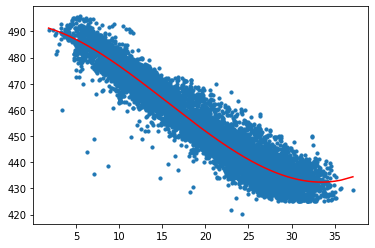

MAE score is  19.041053390646546
RMSE score is  23.493414631297387
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.912     
Dependent Variable: PE               AIC:                58209.9482
Date:               2022-09-23 11:57 BIC:                58238.6129
No. Observations:   9568             Log-Likelihood:     -29101.   
Df Model:           3                F-statistic:        3.299e+04 
Df Residuals:       9564             Prob (F-statistic): 0.00      
R-squared:          0.912            Scale:              25.675    
---------------------------------------------------------------------
         Coef.     Std.Err.      t       P>|t|     [0.025     0.975] 
---------------------------------------------------------------------
const   492.7281     0.6729   732.2476   0.0000   491.4091   494.0472
x1       -0.6103     0.1235    -4.9411   0.0000    -0.8525    -0.3682
x2       -0.1251     0.0069   -18.1989   0.0000    -0.138

In [40]:
plot_polynomial_statsmodel(np.array(X['AT']).reshape(-1,1),y)

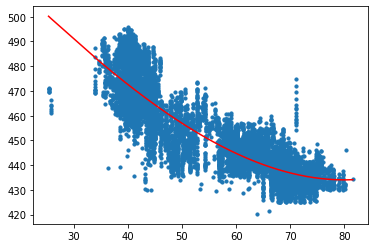

MAE score is  18.394708007742306
RMSE score is  22.648320424429954
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.775     
Dependent Variable: PE               AIC:                67178.3543
Date:               2022-09-23 11:57 BIC:                67207.0190
No. Observations:   9568             Log-Likelihood:     -33585.   
Df Model:           3                F-statistic:        1.098e+04 
Df Residuals:       9564             Prob (F-statistic): 0.00      
R-squared:          0.775            Scale:              65.553    
---------------------------------------------------------------------
          Coef.     Std.Err.      t      P>|t|     [0.025     0.975] 
---------------------------------------------------------------------
const    554.1468     9.1508   60.5574   0.0000   536.2094   572.0843
x1        -2.1444     0.5088   -4.2145   0.0000    -3.1418    -1.1470
x2        -0.0027     0.0092   -0.2943   0.7685    -0.020

In [41]:
plot_polynomial_statsmodel(np.array(X['V']).reshape(-1,1),y)

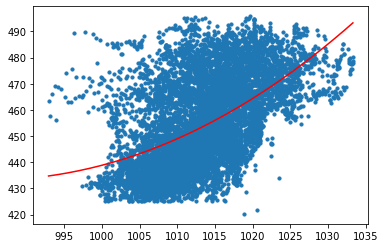

MAE score is  16.073490528970392
RMSE score is  19.35492914164173
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.275     
Dependent Variable: PE               AIC:                78374.3345
Date:               2022-09-23 11:57 BIC:                78395.8330
No. Observations:   9568             Log-Likelihood:     -39184.   
Df Model:           2                F-statistic:        1813.     
Df Residuals:       9565             Prob (F-statistic): 0.00      
R-squared:          0.275            Scale:              211.26    
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const        0.0747     0.0089    8.4147   0.0000    0.0573    0.0921
x1          25.2556     3.0014    8.4147   0.0000   19.3723   31.1389
x2          -0.0500     0.0059   -8.4390   0.0000   -0.061

In [42]:
plot_polynomial_statsmodel(np.array(X['AP']).reshape(-1,1),y)

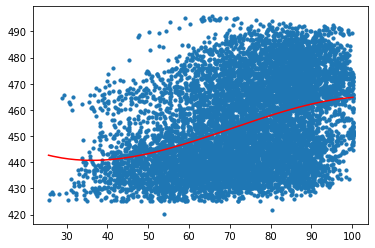

MAE score is  15.539535380924061
RMSE score is  18.389204229405912
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.153     
Dependent Variable: PE               AIC:                79854.2409
Date:               2022-09-23 11:57 BIC:                79882.9056
No. Observations:   9568             Log-Likelihood:     -39923.   
Df Model:           3                F-statistic:        579.2     
Df Residuals:       9564             Prob (F-statistic): 0.00      
R-squared:          0.154            Scale:              246.58    
---------------------------------------------------------------------
          Coef.     Std.Err.      t      P>|t|     [0.025     0.975] 
---------------------------------------------------------------------
const    468.4135    10.5447   44.4216   0.0000   447.7436   489.0834
x1        -1.7292     0.4862   -3.5568   0.0004    -2.6822    -0.7762
x2         0.0321     0.0073    4.4330   0.0000     0.017

In [43]:
plot_polynomial_statsmodel(np.array(X['RH']).reshape(-1,1),y)

### Statistically significant values for AT are x1,x2,x3
### Statistically significant values for V are x1,x3
### Statistically significant values for AP are x1,x2,x3
### Statistically significant values for RH are x1,x2,x3

### Statistically significant values are the ones having p<0.05
### In cae of 'V' x2 is >0.05 thus it is statistically insignificant.

**Observing the results above, it is clear that some non-linear coefficients, if not all are statistically significant. This is evidence of a non-linear association between predictors and the response**

**(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.**

In [44]:
data=df
data['AT_V']=df['AT']*df['V']
data['AT_AP']=df['AT']*df['AP']
data['AT_RH']=df['AT']*df['RH']
data['V_AP']=df['V']*df['AP']
data['V_RH']=df['V']*df['RH']
data['AP_RH']=df['AP']*df['RH']


In [45]:
data

,AT,V,AP,RH,PE,AT_V,AT_AP,AT_RH,V_AP,V_RH,AP_RH
0,14.96,41.76,1024.07,73.17,463.26,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019
1,25.18,62.96,1020.04,59.08,444.37,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632
2,5.11,39.40,1012.16,92.14,488.56,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224
3,20.86,57.32,1010.24,76.64,446.48,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936
4,10.82,37.50,1009.23,96.62,473.90,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026
...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03,827.3385,16883.2665,1515.1500,50386.1569,4521.7900,92274.9100
9564,13.19,39.18,1023.67,66.78,469.62,516.7842,13502.2073,880.8282,40107.3906,2616.4404,68360.6826
9565,31.32,74.33,1012.92,36.48,429.57,2328.0156,31724.6544,1142.5536,75290.3436,2711.5584,36951.3216
9566,24.48,69.45,1013.86,62.39,435.74,1700.1360,24819.2928,1527.3072,70412.5770,4332.9855,63254.7254


In [46]:
X_d=data[['AT','V','AP','RH','AT_V','AT_AP','AT_RH','V_AP','V_RH','AP_RH']]
y_d= data['PE']
mod = sm.OLS(y_d,X_d)
fii = mod.fit()
print(fii.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 1.000     
Dependent Variable:     PE               AIC:                         55192.2478
Date:                   2022-09-23 11:57 BIC:                         55263.9096
No. Observations:       9568             Log-Likelihood:              -27586.   
Df Model:               10               F-statistic:                 1.057e+07 
Df Residuals:           9558             Prob (F-statistic):          0.00      
R-squared (uncentered): 1.000            Scale:                       18.718    
-------------------------------------------------------------------------------------
             Coef.       Std.Err.         t          P>|t|        [0.025       0.975]
-------------------------------------------------------------------------------------
AT           0.6622        2.3116        0.2865      0.7745      -3.8690       5.1934
V           -4.2156        1.2963

### Yes, there evidence of association of interactions of predictors with the response
### The interaction terms which are statistically significant have p values <0.05

### They are as follows:

#### AT & V  (p-value = 0.0000)
 
#### AT & RH (p-value = 0.0000)
 
#### V & AP  (p-value = 0.0063)
 
#### AP & RH (p-value = 0.0000)
 
 
 


**(h) Can you improve your model using possible interaction terms or nonlinear asso- ciations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regres- sion model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [48]:
#Training the regression model on a randomly selected 70% subset of the data with all predictors
mod_1 = sm.OLS(y_train,X_train)
fitted_model_1 = mod_1.fit()
print(fitted_model_1.summary2())


                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.929     
Dependent Variable: PE               AIC:                39290.8447
Date:               2022-09-23 11:57 BIC:                39324.8918
No. Observations:   6697             Log-Likelihood:     -19640.   
Df Model:           4                F-statistic:        2.182e+04 
Df Residuals:       6692             Prob (F-statistic): 0.00      
R-squared:          0.929            Scale:              20.662    
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
const      458.8703   11.5182    39.8388  0.0000  436.2910  481.4495
AT          -1.9866    0.0184  -108.0358  0.0000   -2.0226   -1.9505
V           -0.2268    0.0087   -25.9731  0.0000   -0.2439   -0.2097
AP           0.0577    0.0112     5.1690  0.0000    0.0358  

In [49]:
#run a regres-sion model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms).
data['AT_AT']=df['AT']*df['AT']
data['V_V']=df['V']*df['V']
data['AP_AP']=df['AP']*df['AP']
data['RH_RH']=df['RH']*df['RH']
data



,AT,V,AP,RH,PE,AT_V,AT_AP,AT_RH,V_AP,V_RH,AP_RH,AT_AT,V_V,AP_AP,RH_RH
0,14.96,41.76,1024.07,73.17,463.26,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019,223.8016,1743.8976,1.048719e+06,5353.8489
1,25.18,62.96,1020.04,59.08,444.37,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632,634.0324,3963.9616,1.040482e+06,3490.4464
2,5.11,39.40,1012.16,92.14,488.56,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224,26.1121,1552.3600,1.024468e+06,8489.7796
3,20.86,57.32,1010.24,76.64,446.48,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936,435.1396,3285.5824,1.020585e+06,5873.6896
4,10.82,37.50,1009.23,96.62,473.90,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026,117.0724,1406.2500,1.018545e+06,9335.4244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03,827.3385,16883.2665,1515.1500,50386.1569,4521.7900,92274.9100,277.2225,2469.0961,1.028216e+06,8281.0000
9564,13.19,39.18,1023.67,66.78,469.62,516.7842,13502.2073,880.8282,40107.3906,2616.4404,68360.6826,173.9761,1535.0724,1.047900e+06,4459.5684
9565,31.32,74.33,1012.92,36.48,429.57,2328.0156,31724.6544,1142.5536,75290.3436,2711.5584,36951.3216,980.9424,5524.9489,1.026007e+06,1330.7904
9566,24.48,69.45,1013.86,62.39,435.74,1700.1360,24819.2928,1527.3072,70412.5770,4332.9855,63254.7254,599.2704,4823.3025,1.027912e+06,3892.5121


In [50]:
#Training the model
X_data_h=data[['AT','V','AP','RH','AT_V','AT_AP','AT_RH','V_AP','V_RH','AP_RH','AT_AT','V_V','AP_AP','RH_RH']]
y_data_h= data['PE']
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_data_h, y_data_h,test_size=0.3)
mod_2 = sm.OLS(y_train_h,X_train_h)
fitted_model_2 = mod_2.fit()
print(fitted_model_2.summary2())



                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 1.000     
Dependent Variable:     PE               AIC:                         38496.9844
Date:                   2022-09-23 11:57 BIC:                         38592.3163
No. Observations:       6697             Log-Likelihood:              -19234.   
Df Model:               14               F-statistic:                 5.394e+06 
Df Residuals:           6683             Prob (F-statistic):          0.00      
R-squared (uncentered): 1.000            Scale:                       18.328    
------------------------------------------------------------------------------------
               Coef.       Std.Err.        t        P>|t|       [0.025       0.975] 
------------------------------------------------------------------------------------
AT            -17.7075       3.2685     -5.4176     0.0000     -24.1149     -11.3001
V              -0.4672       1.8009  

#### Rejecting the columns : V, V_AP,V_RH,V_V 
#### Since the p values are greater than 0.05, these terms are not statistically significant.
#### We cannot drop V as interaction AT_V is statistically significant. 
#### According to the hierarchical principle: "If we include an interaction in a model, we should also include the main effects, even if the p-values associated with their coefficients are not significant."

In [51]:
data.drop(['V_AP','V_RH','V_V'],axis='columns',inplace= True)


In [52]:
new_d_aft_drop=data

In [53]:
new_d_aft_drop


,AT,V,AP,RH,PE,AT_V,AT_AP,AT_RH,AP_RH,AT_AT,AP_AP,RH_RH
0,14.96,41.76,1024.07,73.17,463.26,624.7296,15320.0872,1094.6232,74931.2019,223.8016,1.048719e+06,5353.8489
1,25.18,62.96,1020.04,59.08,444.37,1585.3328,25684.6072,1487.6344,60263.9632,634.0324,1.040482e+06,3490.4464
2,5.11,39.40,1012.16,92.14,488.56,201.3340,5172.1376,470.8354,93260.4224,26.1121,1.024468e+06,8489.7796
3,20.86,57.32,1010.24,76.64,446.48,1195.6952,21073.6064,1598.7104,77424.7936,435.1396,1.020585e+06,5873.6896
4,10.82,37.50,1009.23,96.62,473.90,405.7500,10919.8686,1045.4284,97511.8026,117.0724,1.018545e+06,9335.4244
...,...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03,827.3385,16883.2665,1515.1500,92274.9100,277.2225,1.028216e+06,8281.0000
9564,13.19,39.18,1023.67,66.78,469.62,516.7842,13502.2073,880.8282,68360.6826,173.9761,1.047900e+06,4459.5684
9565,31.32,74.33,1012.92,36.48,429.57,2328.0156,31724.6544,1142.5536,36951.3216,980.9424,1.026007e+06,1330.7904
9566,24.48,69.45,1013.86,62.39,435.74,1700.1360,24819.2928,1527.3072,63254.7254,599.2704,1.027912e+06,3892.5121


In [54]:
X_data_aft_drop=data[['AT','V','AP','RH','AT_V','AT_AP','AT_RH','AP_RH','AT_AT','AP_AP','RH_RH']]
y_data_aft_drop= data['PE']
X_train_aft_drop, X_test_aft_drop, y_train_aft_drop, y_test_aft_drop = train_test_split(X_data_aft_drop, y_data_aft_drop,test_size=0.3)
mod_3 = sm.OLS(y_train_aft_drop,X_train_aft_drop)
fitted_model_3 = mod_3.fit()
print(fitted_model_3.summary2())


                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 1.000     
Dependent Variable:     PE               AIC:                         38472.0152
Date:                   2022-09-23 11:57 BIC:                         38546.9188
No. Observations:       6697             Log-Likelihood:              -19225.   
Df Model:               11               F-statistic:                 6.891e+06 
Df Residuals:           6686             Prob (F-statistic):          0.00      
R-squared (uncentered): 1.000            Scale:                       18.268    
------------------------------------------------------------------------------------
              Coef.       Std.Err.        t         P>|t|       [0.025       0.975] 
------------------------------------------------------------------------------------
AT           -15.9093       1.8120      -8.7802     0.0000     -19.4613     -12.3573
V             -0.4633       0.0322   

In [55]:
fitted_model_3.params

AT      -15.909287
V        -0.463277
AP        1.044048
RH        1.649809
AT_V      0.008295
AT_AP     0.013083
AT_RH    -0.004845
AP_RH    -0.001383
AT_AT     0.019455
AP_AP    -0.000531
RH_RH    -0.001904
dtype: float64

In [56]:
#Reporting both models on the remaining points and their train and test MSEs.

predictions_train_mod1= fitted_model_1.predict(X_train)
predictions_test_mod1= fitted_model_1.predict(X_test)
predictions_train_mod3= fitted_model_3.predict(X_train_aft_drop)
predictions_test_mod3= fitted_model_3.predict(X_test_aft_drop)
print('For regression model trained only on predictors : ')
print("train_MSE: ", mean_squared_error(predictions_train_mod1,y_train))
print("test_MSE: ", mean_squared_error(predictions_test_mod1,y_test))
print('For regression model trained on predictors as well as interactions : ')
print("train_MSE: ", mean_squared_error(predictions_train_mod3,y_train_aft_drop))
print("test_MSE: ", mean_squared_error(predictions_test_mod3,y_test_aft_drop))

For regression model trained only on predictors : 
train_MSE:  20.646831955994255
test_MSE:  21.061988965607895
For regression model trained on predictors as well as interactions : 
train_MSE:  18.237901698237373
test_MSE:  18.086528938753975


#### Lesser Mean Squared indicates a better fit of the model.
#### The MSE of model with all interactions is lesser than model with only predictors
#### Thus including using possible interaction terms or nonlinear associations between the predictors and response improves the model.

**(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.**

In [57]:
#Normalization
scaler = MinMaxScaler()
X_train_normalized=scaler.fit_transform(X_train)
X_test_normalized=scaler.fit_transform(X_test)

In [58]:
#KNN regression for the raw features
model_KNN_rawf= KNeighborsRegressor()
model_KNN_rawf.fit(X_train,y_train)

KNeighborsRegressor()

In [59]:
print(model_KNN_rawf.predict(X_test))

[458.058 475.816 437.972 ... 434.622 465.848 477.474]


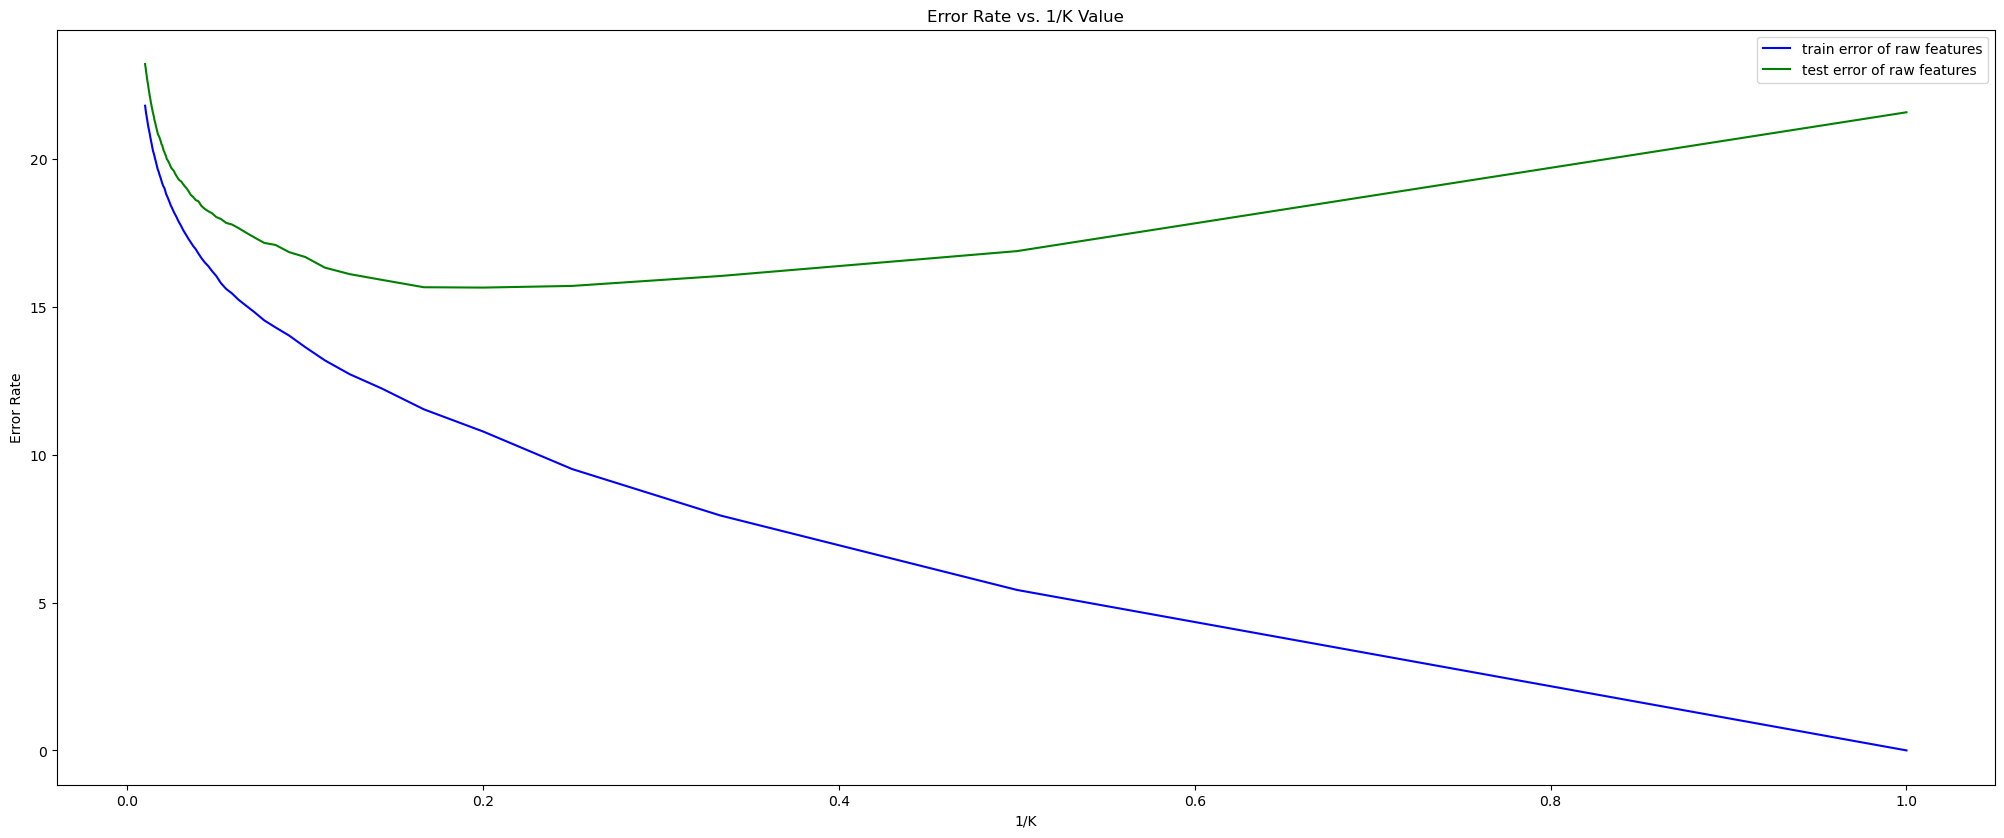

The most optimal k(k*) is 5
with test  error:  15.65351383908046


In [60]:
#Finding the training and testing errors for raw features
error_rate_test_rawf = []
error_rate_train_rawf= []

for i in range(1,101,1):
    
    model= KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred_train_rawf= model.predict(X_train)
    y_pred_test_rawf= model.predict(X_test)
    error_rate_train_rawf.append(mean_squared_error(y_pred_train_rawf, y_train))
    error_rate_test_rawf.append(mean_squared_error(y_pred_test_rawf, y_test))
figure(figsize=(25, 10), dpi=100)
inv_k = [1/i for i in range(1,101,1)]
plt.plot(inv_k,error_rate_train_rawf,color='blue',label = "train error of raw features")
plt.plot(inv_k,error_rate_test_rawf,color='green',label= "test error of raw features")
plt.title('Error Rate vs. 1/K Value')
plt.xlabel('1/K')
# plt.xticks(np.arange(1,101, step=1))
plt.ylabel('Error Rate')
plt.legend()
plt.show();
least_error_value=min(error_rate_test_rawf)
index=error_rate_test_rawf.index(least_error_value)
print('The most optimal k(k*) is',list(range(1,101,1))[index])
print('with test  error: ',least_error_value)



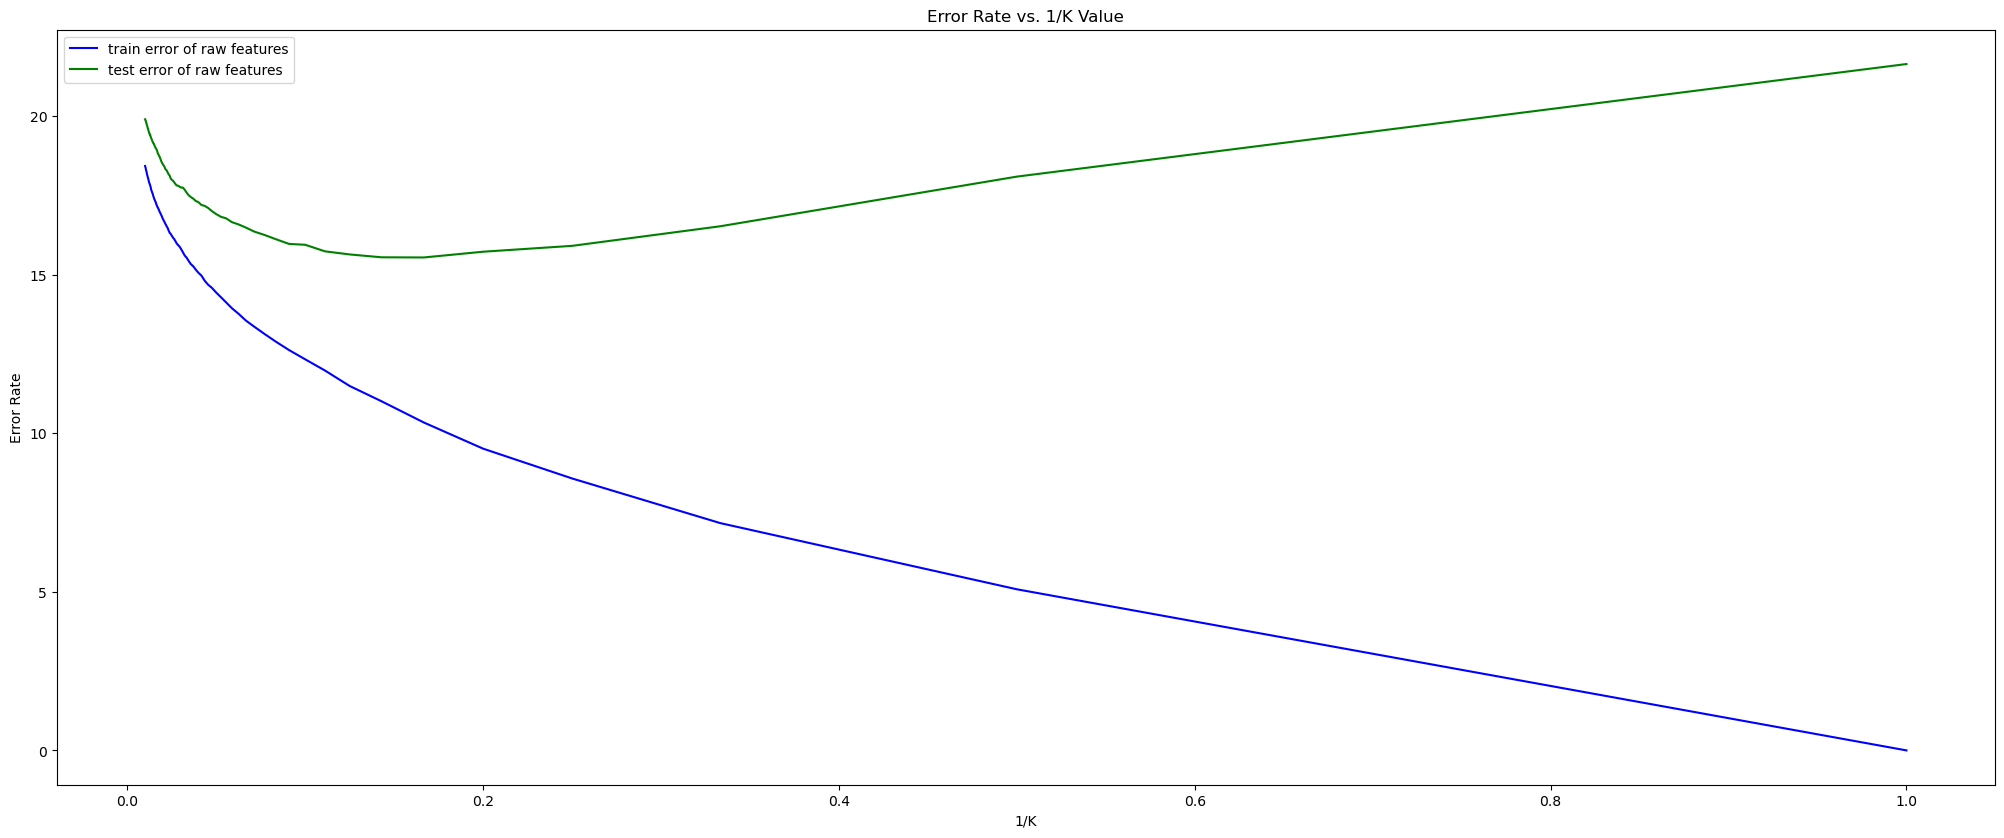

The most optimal k(k*) is 6
with test  error:  15.544759465343088


In [61]:
#Finding the training and testing errors for normalized features
error_rate_test_normalizedf = []
error_rate_train_normalizedf= []

for i in range(1,101,1):
    
    model= KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train_normalized,y_train)
    y_pred_train_normalizedf= model.predict(X_train_normalized)
    y_pred_test_normalizedf= model.predict(X_test_normalized)
    error_rate_train_normalizedf.append(mean_squared_error(y_pred_train_normalizedf, y_train))
    error_rate_test_normalizedf.append(mean_squared_error(y_pred_test_normalizedf, y_test))
figure(figsize=(25, 10), dpi=100)
inv_k = [1/i for i in range(1,101,1)]
plt.plot(inv_k,error_rate_train_normalizedf,color='blue',label = "train error of raw features")
plt.plot(inv_k,error_rate_test_normalizedf,color='green',label= "test error of raw features")
plt.title('Error Rate vs. 1/K Value')
plt.xlabel('1/K')
# plt.xticks(np.arange(1,101, step=1))
plt.ylabel('Error Rate')
plt.legend()
plt.show();
least_error_value=min(error_rate_test_normalizedf)
index=error_rate_test_normalizedf.index(least_error_value)
print('The most optimal k(k*) is',list(range(1,101,1))[index])
print('with test  error: ',least_error_value)


**(j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.**

### The KNN regression test MSE for optimal k is lesser than that of linear regression model.
### This implies that KNN is a better fit than linear regression.

**2. ISLR: 2.4.1**

**1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.**


(a) The sample size n is extremely large, and the number of predictors p is small.\
Ans: Better

A flexible statistical learning method would be better than an inflexible method. This is because an extremely large n means there are a lot of samples/observations and with small number of predictors an inflexible method could cause overfitting.

A flexible method will be better at preventing overfitting.



**(b) The number of predictors p is extremely large, and the number of observations n is small.**

Ans: Worse

When flexible statistical learning methods are used with a small number of observations (n), there are high chances that it will tend to overfit and thus perform poorly.

Hence an inflexible method is preferred when predictors are extremely large and the number of observations os small.

**(c) The relationship between the predictors and response is highly non-linear.**

Ans: Better

A flexible method has the ability to deal with the non-linear relationship between predictors and response.
It will fit better than an inflexible method.



**(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.**

Ans: Worse

Variance falls under the category of irreducible error.

High variance implies huge irreducible error. If a flexible model is used it will find a way to fit and could possibly even overfit.

Whereas in an inflexible method the chances of overfitting are lesser.


**3. ISLR: 2.4.7**

(a) Compute the Euclidean distance between each observation and thetestpoint,X1 =X2 =X3 =0.\
(b) What is our prediction with K = 1? Why?\
(c) What is our prediction with K = 3? Why?\
(d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?

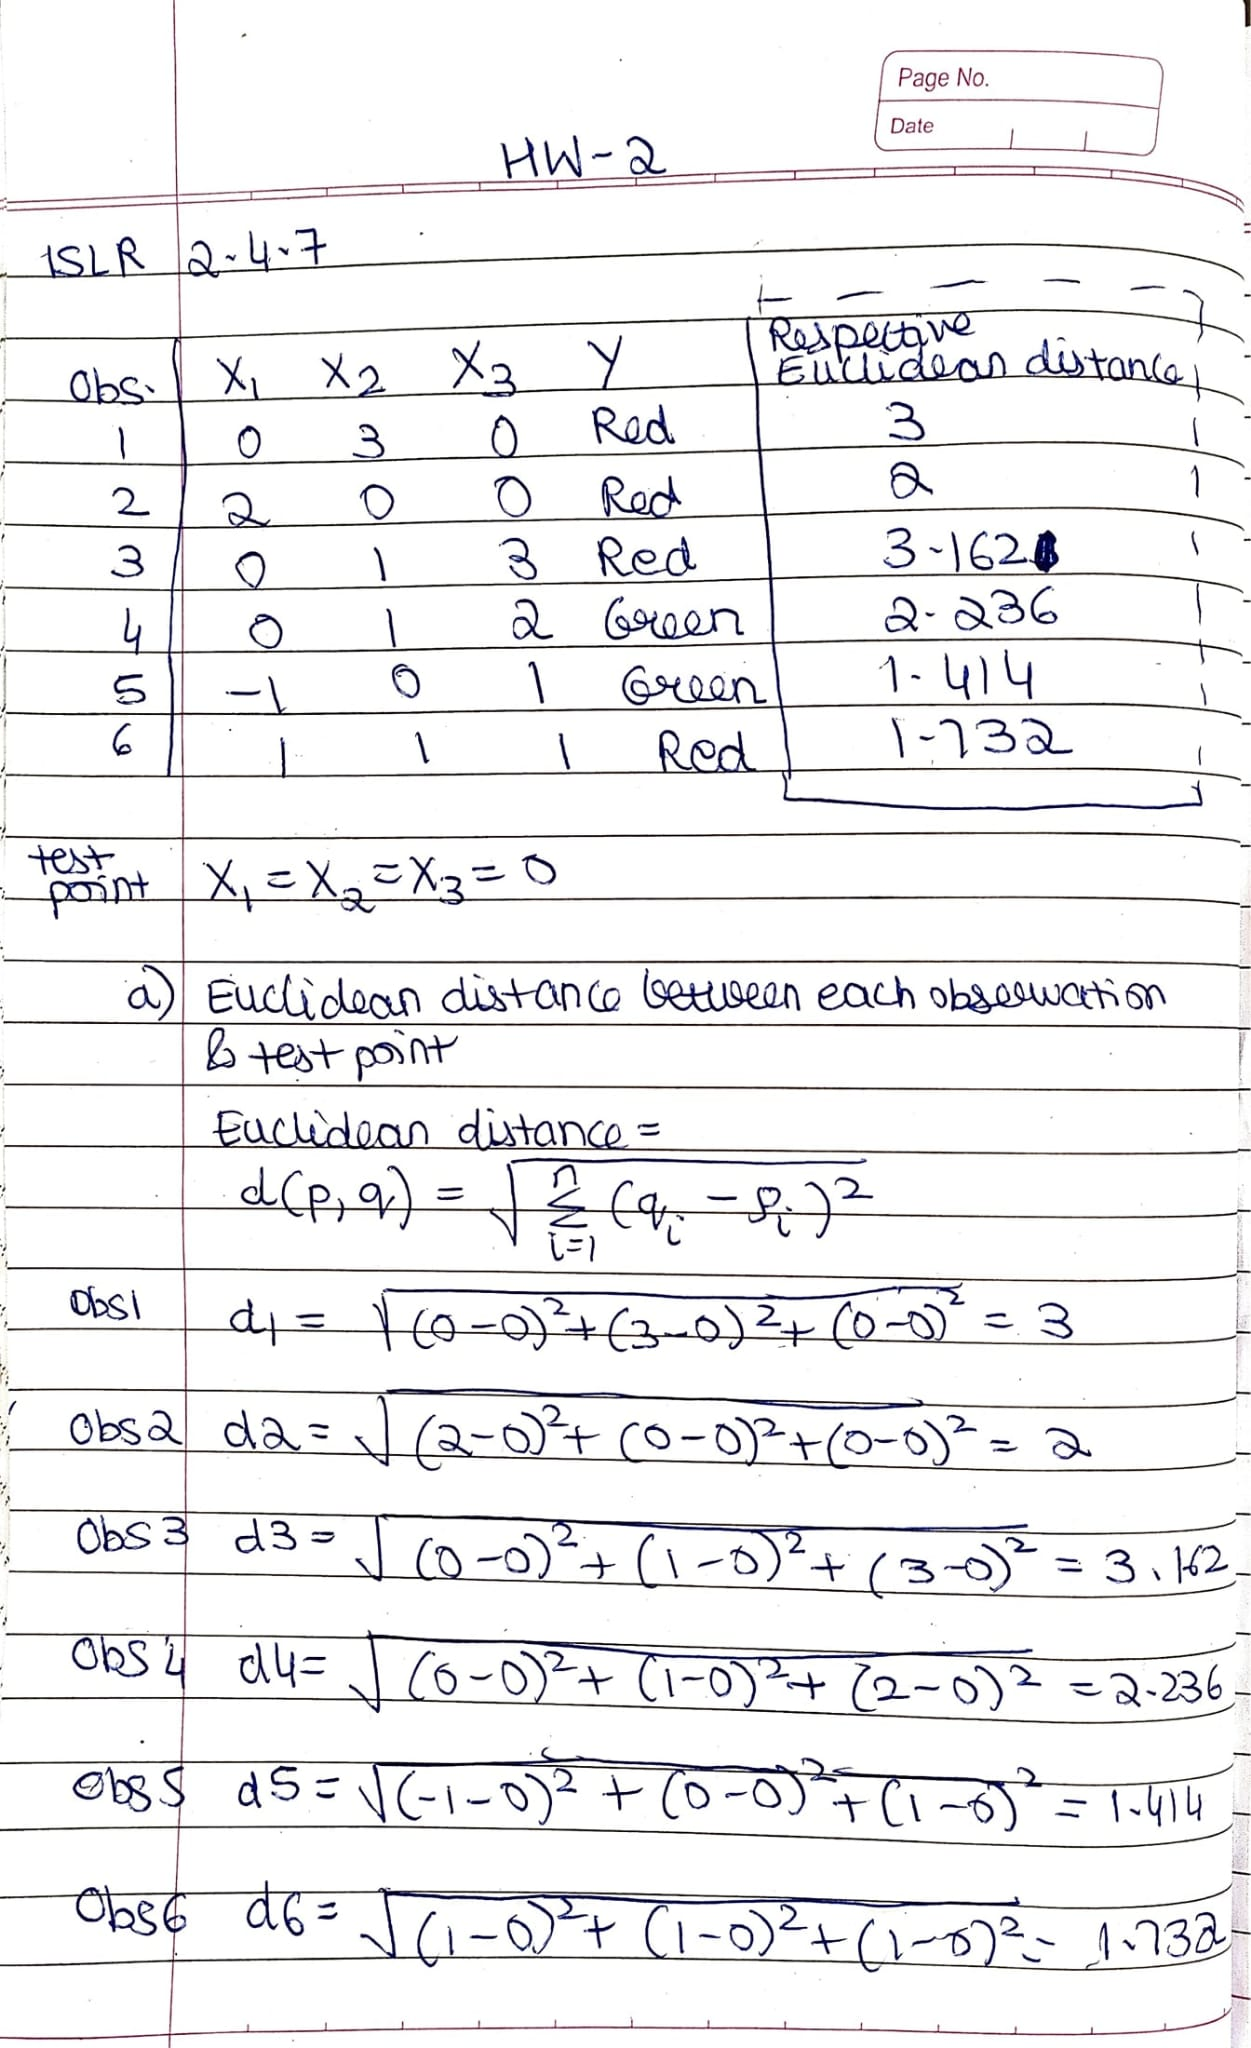

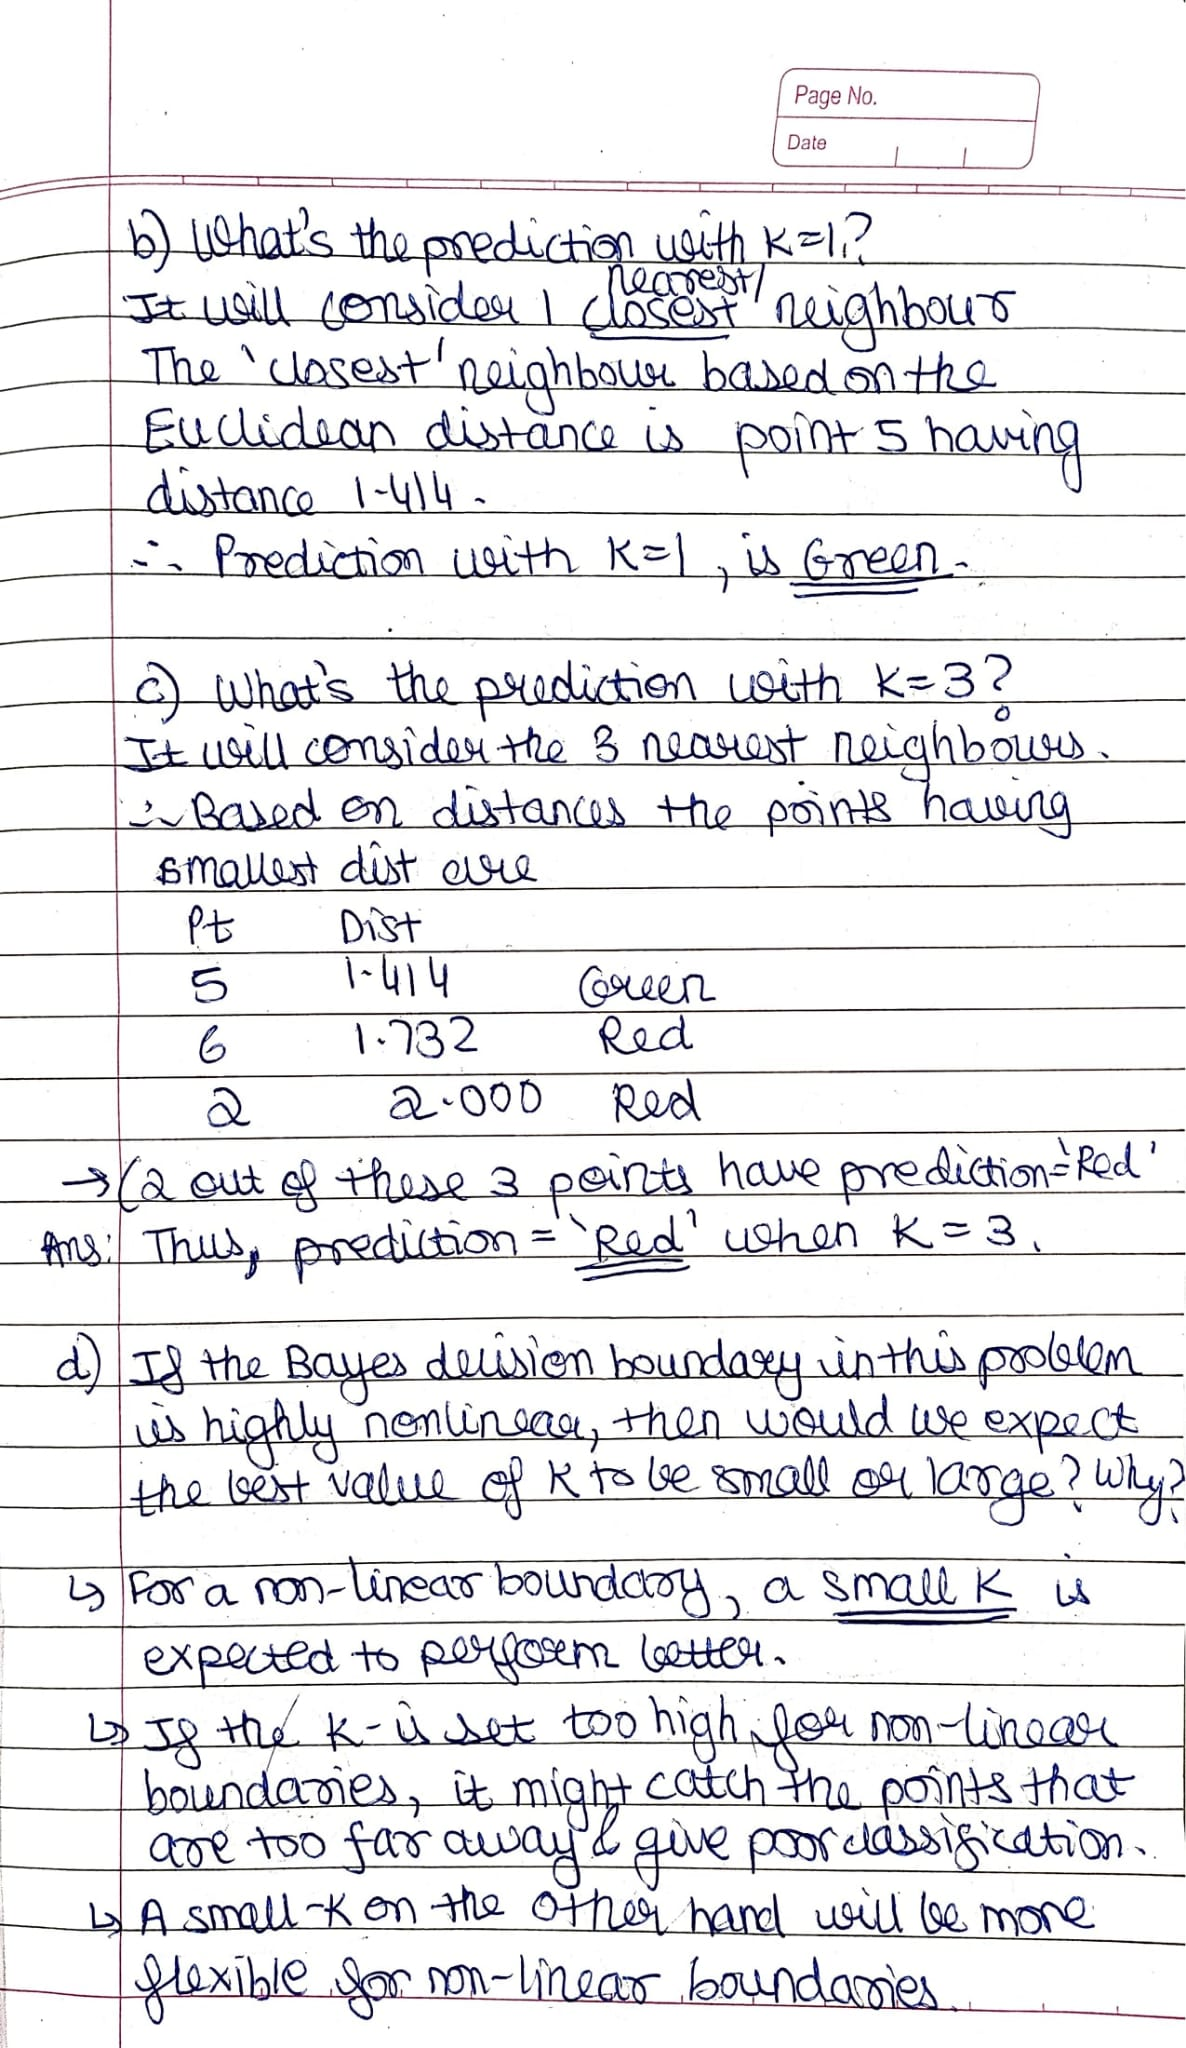

References:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/

https://statisticsbyjim.com/regression/low-r-squared-regression/

https://www.coursehero.com/study-guides/odessa-introstats1-1/types-of-outliers-in-linear-regression/

https://www.geeksforgeeks.org/ml-multiple-linear-regression-using-python/

https://ostwalprasad.github.io/machine-learning/Polynomial-Regression-using-statsmodel.html 

https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

https://stackoverflow.com/questions/47388258/how-to-extract-the-regression-coefficient-from-statsmodels-api

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

https://towardsdatascience.com/outlier-detection-in-regression-using-cooks-distance-f5e4954461a0




In [62]:
!pip freeze > requirements.txt